## Disease Prediction from Symptoms

For this project, we'll be using the dataset from here: http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the data from all the columns and paste it into an excel sheet -> `raw_data.xlsx`

In [ ]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read Raw Dataset
df = pd.read_excel('/content/raw_data.xlsx')

In [ ]:
df.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,NaN,NaN,UMLS:C0392680_shortness of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [ ]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

<ipython-input-5-c3a2071c04ef>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


In [ ]:
data.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall


In [ ]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [ ]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():

    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [ ]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [ ]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [ ]:
# Save cleaned data as CSV
f = open('/content/cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [ ]:
# Read Cleaned Data as DF
df = pd.read_csv('/content/cleaned_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

,disease,symptom,occurence_count
0,hypertensive disease,shortness of breath,3363.0
1,hypertensive disease,dizziness,3363.0
2,hypertensive disease,asthenia,3363.0
3,hypertensive disease,fall,3363.0
4,hypertensive disease,syncope,3363.0


In [ ]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

 # ***EXPLORATORY DATA ANALYSIS***

***1) Distribution of Disease Occurrences***

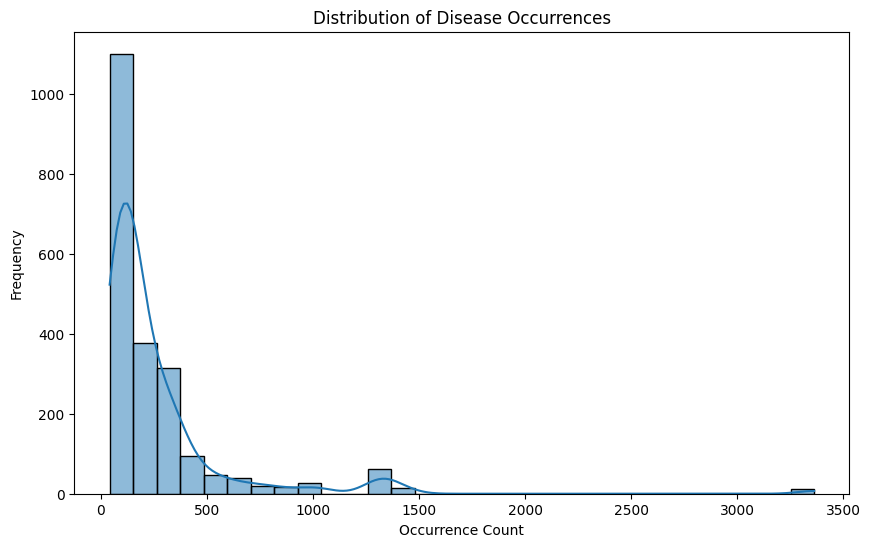

In [ ]:
# Distribution of Disease Occurrences
plt.figure(figsize=(10, 6))
sns.histplot(df['occurence_count'], kde=True, bins=30)
plt.title('Distribution of Disease Occurrences')
plt.xlabel('Occurrence Count')
plt.ylabel('Frequency')
plt.show()

***Top 10 most common diseases***


<ipython-input-15-e9e2fa2e7cc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_diseases.index, x=top_diseases.values, palette="viridis")


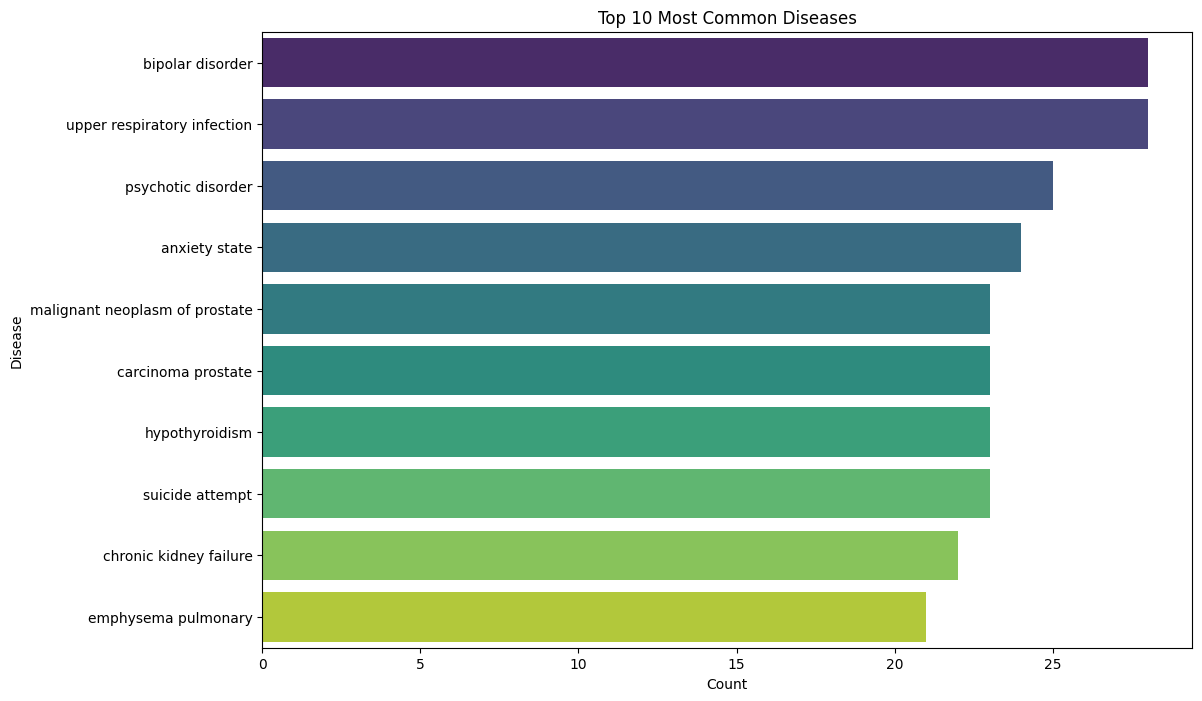

In [ ]:
top_diseases = df['disease'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_diseases.index, x=top_diseases.values, palette="viridis")
plt.title('Top 10 Most Common Diseases')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.show()

***Distribution of Symptoms***


<ipython-input-16-ad6485fe1a90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="symptom", data=df, order=df['symptom'].value_counts().iloc[:20].index, palette="coolwarm")


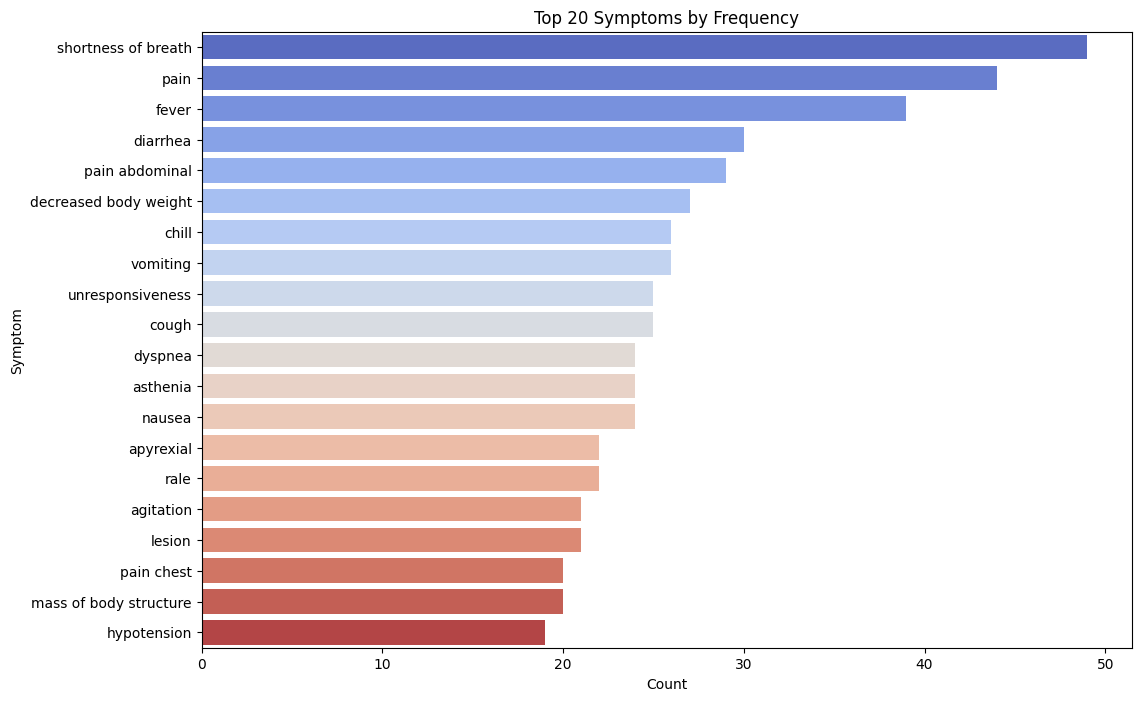

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y="symptom", data=df, order=df['symptom'].value_counts().iloc[:20].index, palette="coolwarm")
plt.title('Top 20 Symptoms by Frequency')
plt.xlabel('Count')
plt.ylabel('Symptom')
plt.show()

***Violin Plot for Occurrence Counts of Symptoms (Top Symptoms)***


<ipython-input-17-5b7d8e2aa1af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="occurence_count", y="symptom", data=symptom_data_top_symptoms, palette="muted", scale="width")
<ipython-input-17-5b7d8e2aa1af>:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="occurence_count", y="symptom", data=symptom_data_top_symptoms, palette="muted", scale="width")


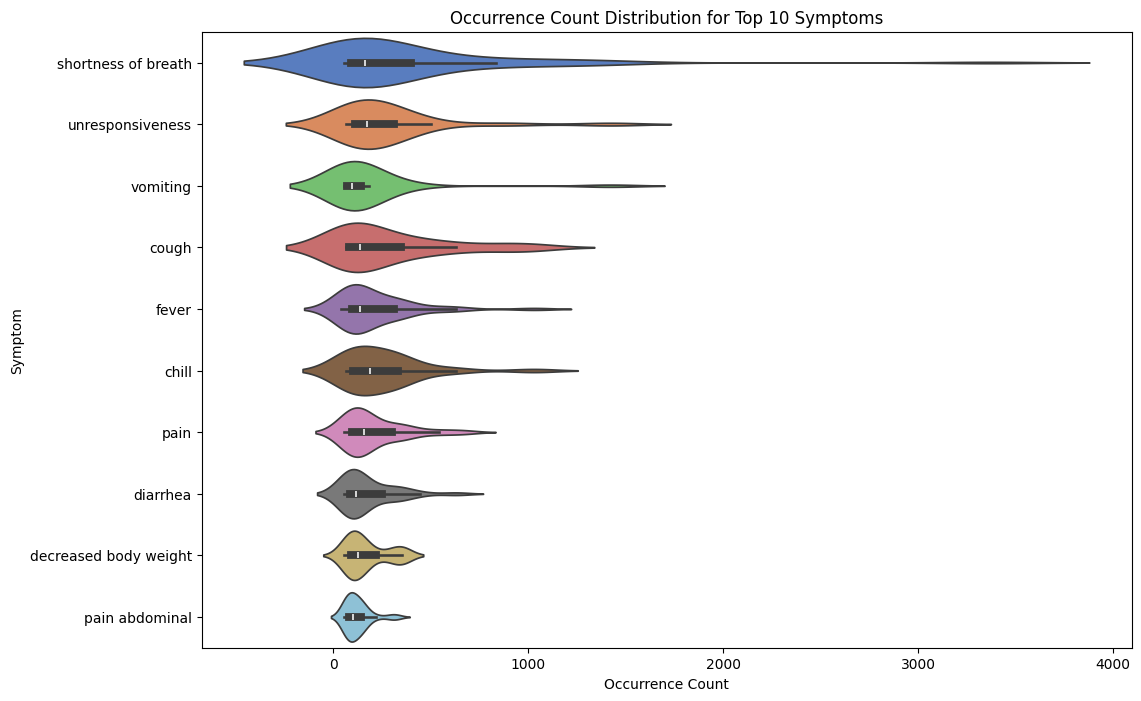

In [ ]:
top_symptoms = df['symptom'].value_counts().nlargest(10).index
symptom_data_top_symptoms = df[df['symptom'].isin(top_symptoms)]

plt.figure(figsize=(12, 8))
sns.violinplot(x="occurence_count", y="symptom", data=symptom_data_top_symptoms, palette="muted", scale="width")
plt.title('Occurrence Count Distribution for Top 10 Symptoms')
plt.xlabel('Occurrence Count')
plt.ylabel('Symptom')
plt.show()

***Disease Occurrence Count vs Symptom Count***



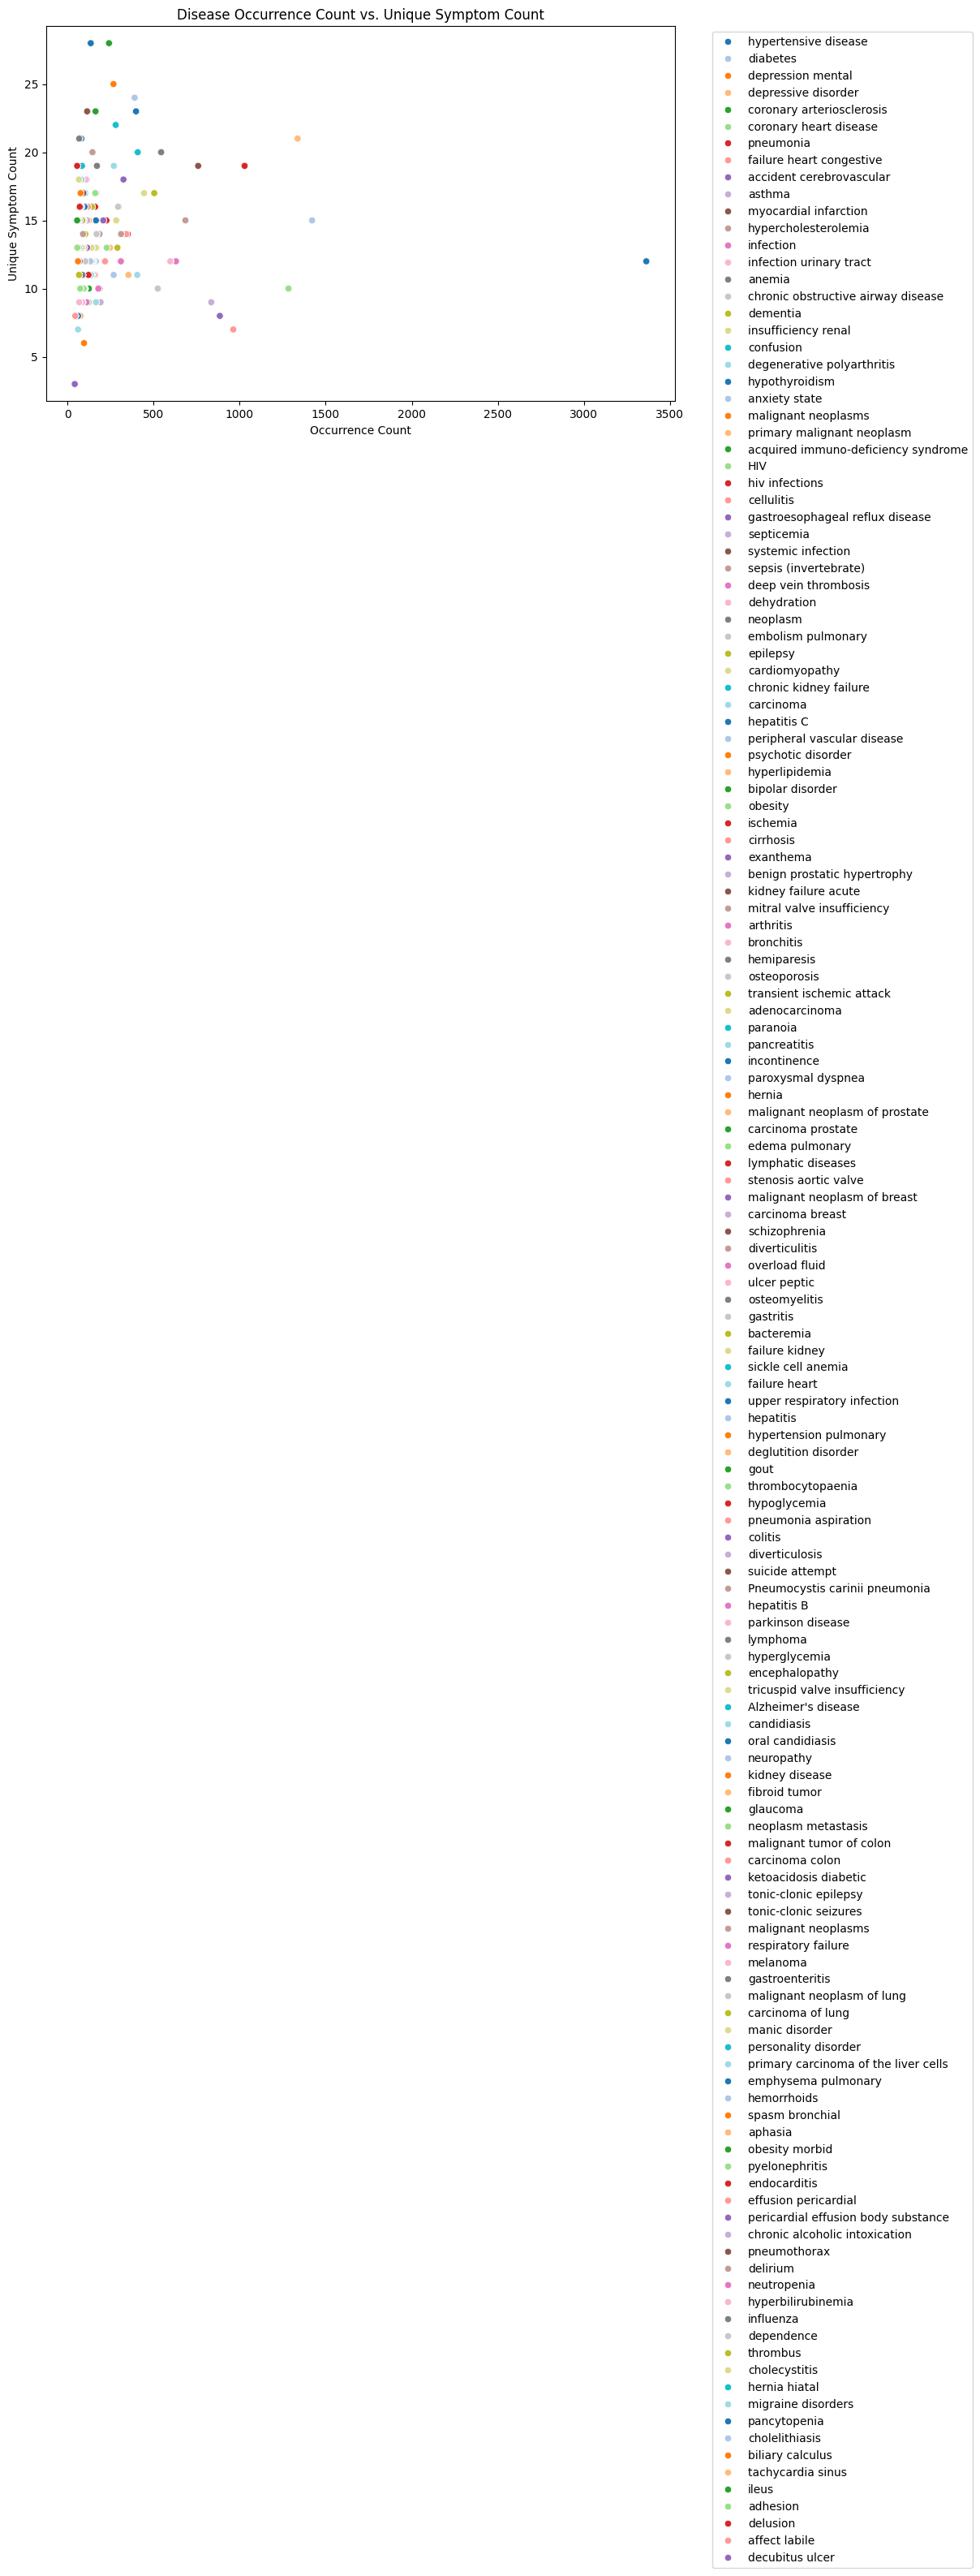

In [ ]:
symptom_count = df.groupby('disease')['symptom'].nunique().reset_index()
symptom_count.columns = ['disease', 'unique_symptom_count']
merged_data = pd.merge(df, symptom_count, on='disease')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="occurence_count", y="unique_symptom_count", hue="disease", palette="tab20")
plt.title('Disease Occurrence Count vs. Unique Symptom Count')
plt.xlabel('Occurrence Count')
plt.ylabel('Unique Symptom Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()